# complete case analysis for missing data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("data_science_job.csv")
df.sample(6)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
9850,1301,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,1000-4999,NGO,117.0,0.0
2423,1710,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,20.0,1000-4999,Pvt Ltd,47.0,0.0
14066,22512,city_114,0.926,Male,Has relevent experience,no_enrollment,High School,NaN,17.0,100-500,Pvt Ltd,NaN,0.0
9451,29362,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,10000+,Pvt Ltd,NaN,0.0
14897,12634,city_128,0.527,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,<10,Pvt Ltd,114.0,1.0
8914,27617,city_83,0.923,NaN,Has relevent experience,no_enrollment,Graduate,STEM,20.0,100-500,Pvt Ltd,90.0,0.0


In [3]:
df.shape

(19158, 13)

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
df.isnull().mean()*100 # for taking percentage (columns)

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols# to find out the less then 5 % data is missing

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
12750,0.624,no_enrollment,Masters,11.0,46.0
17539,0.939,no_enrollment,Graduate,10.0,6.0
2647,0.624,Full time course,High School,0.0,96.0
3213,0.913,no_enrollment,Graduate,8.0,NaN
6217,0.624,no_enrollment,Graduate,5.0,55.0


In [8]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [9]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [10]:
len(df[cols].dropna()) /len(df)

0.8968577095730244

In [11]:
new_df = df[cols].dropna()

In [12]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

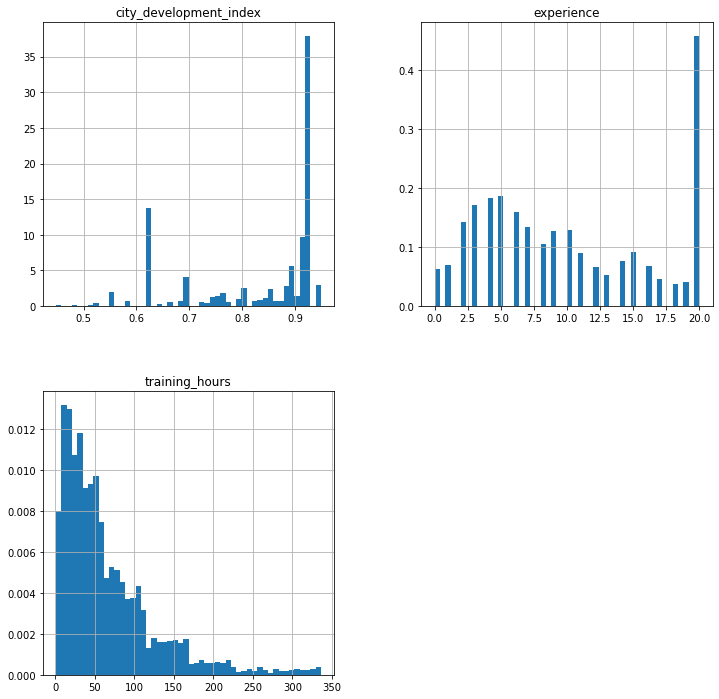

In [13]:
new_df.hist(bins = 50,density =True, figsize=(12,12))
plt.show()

## finding before and after difference

<AxesSubplot:>

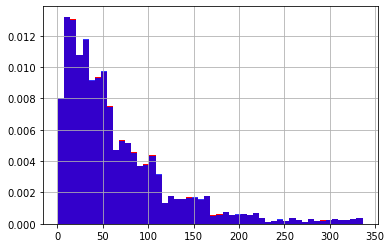

In [14]:
fig =plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins= 50,ax=ax,density=True,color ='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['training_hours'].hist(bins= 50,ax=ax,density=True,color ='blue',alpha=0.8)


<AxesSubplot:ylabel='Density'>

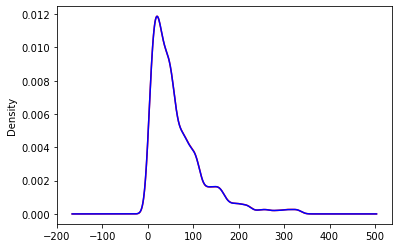

In [15]:
fig =plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].plot.density(color='red')

#data after cca
new_df['training_hours'].plot.density(color='blue')

<AxesSubplot:>

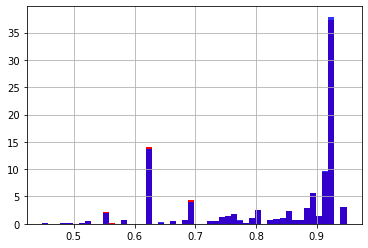

In [16]:
fig =plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins= 50,ax=ax,density=True,color ='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['city_development_index'].hist(bins= 50,ax=ax,density=True,color ='blue',alpha=0.8)


<AxesSubplot:ylabel='Density'>

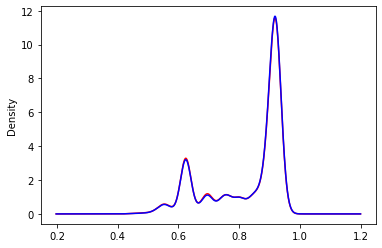

In [17]:
fig =plt.figure()
ax = fig.add_subplot(111)

#original data
df['city_development_index'].plot.density(color='red')

#data after cca
new_df['city_development_index'].plot.density(color='blue')

<AxesSubplot:>

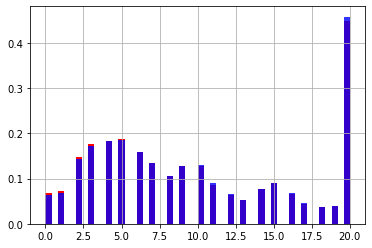

In [18]:
fig =plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins= 50,ax=ax,density=True,color ='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['experience'].hist(bins= 50,ax=ax,density=True,color ='blue',alpha=0.8)


<AxesSubplot:ylabel='Density'>

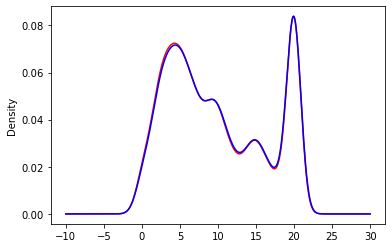

In [19]:
fig =plt.figure()
ax = fig.add_subplot(111)

#original data
df['experience'].plot.density(color='red')

#data after cca
new_df['experience'].plot.density(color='blue')

In [20]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),
    
    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
    
],axis=1)

# add column names
temp.columns = ['original','cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [21]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts() / len(df),
    
    # percentage of observations per category, cca data
    new_df['education_level'].value_counts() / len(new_df)
    
],axis=1)

# add column names
temp.columns = ['original','cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
